# Описание проекта  
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.  

# Задача  
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.  
**А именно:**  
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
    1) выделить целевые группы клиентов;  
    2) предложить меры по снижению оттока;  
    3) определить другие особенности взаимодействия с клиентами.  

# Данные  
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:  
**Данные клиента за предыдущий до проверки факта оттока месяц:**  
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).  

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**  
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df=pd.read_csv('gym_churn.csv')

In [3]:
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

4000 строк данных, 14 столбцов, пропуски при составлении датафрема отсутствуют.  
Возрастная группа аудитории от 18-ти до 41-го лет. Самый долгоживущий клиент на наших услугах находится 31-ну неделю.  
Значения, хранящиеся в датафрейме:  
- gender: 1 мужчина, 0 женщина
- Near_Location: 1 в пределах района, 0 не в пределах района 
- Partner: 1 партнер, 0 нет
- Promo_friends: 1 в рамках акции приведи друга, 0 нет
- Phone: 1 указан контактный телефон 
- Group_visits: 1 занимался в групповых занятиях
- Churn: 0 является нашим клиентом, 1 - отвалился  

Заглавные буквы в названии столбцов - зло. Исправим.

In [6]:
df.columns = df.columns.str.lower()
df.columns #проверка

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [7]:
df.duplicated().sum() #дубликаты

0

Дубликаты не обнаружены, названия столбцов переведены на строчное написание змеиного регистра.

**Проведем исследовательский анализ данных (EDA):**
- Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуемся методом groupby());  
- Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);  
- Построим матрицу корреляций и отобразим её.

In [8]:
#Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
df.groupby(['churn']).agg("mean").transpose().round(3)

churn,0,1
gender,0.510,0.511
near_location,0.873,0.768
partner,0.534,0.355
promo_friends,0.354,0.184
phone,0.904,0.903
contract_period,5.747,1.729
group_visits,0.464,0.269
age,29.977,26.990
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.283,1.663


Посмотрим данные на графиках.

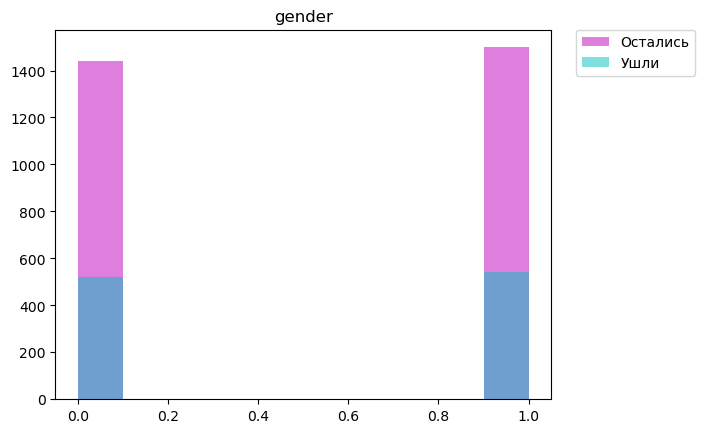

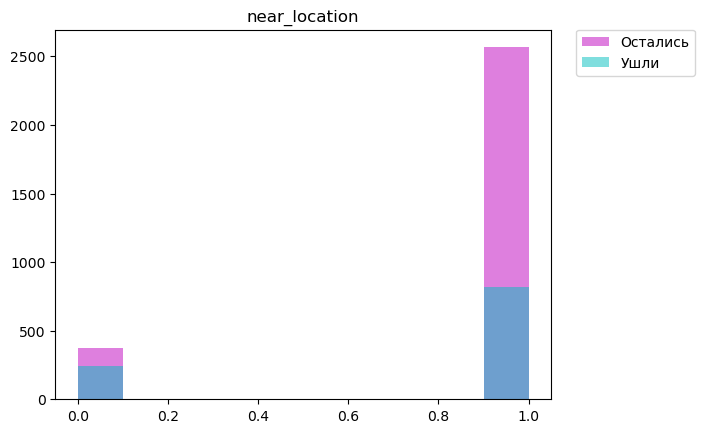

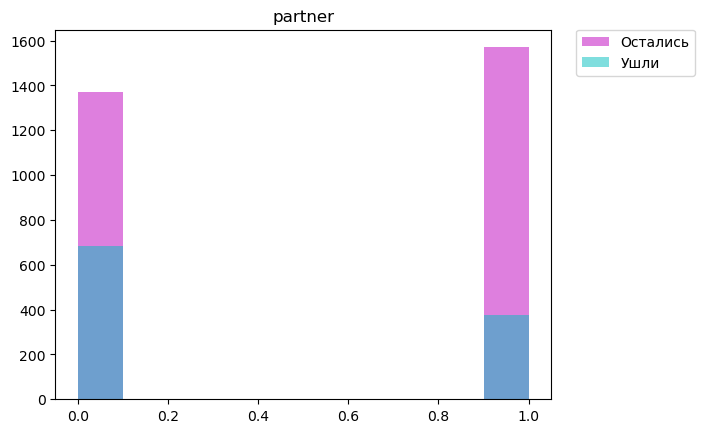

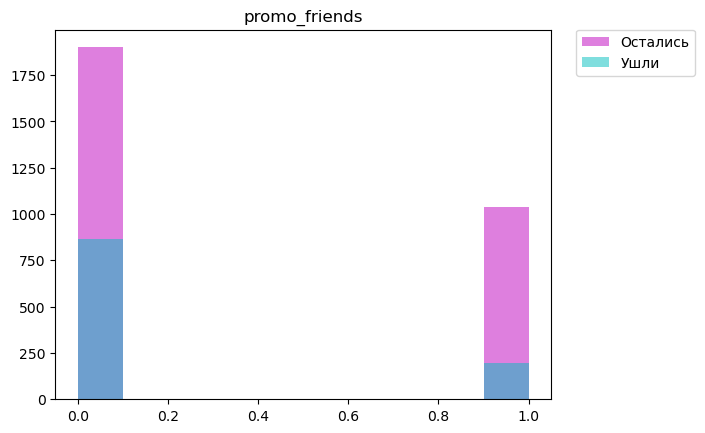

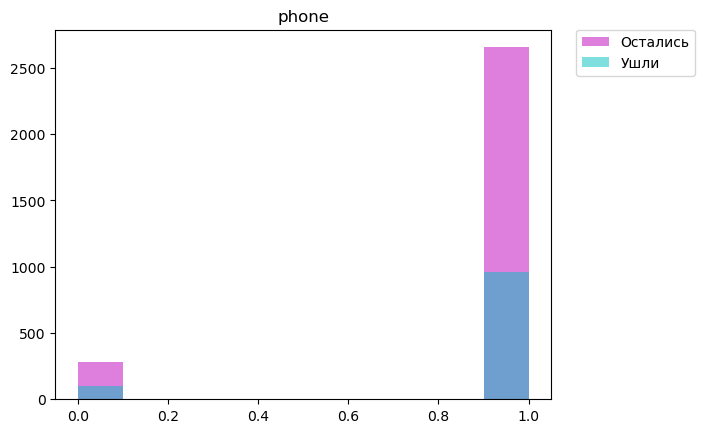

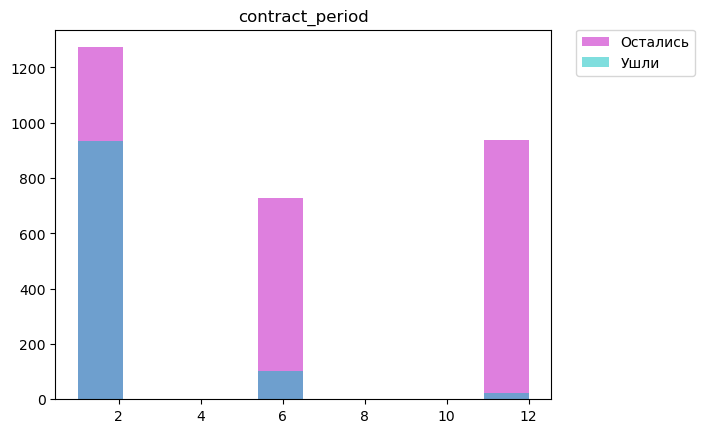

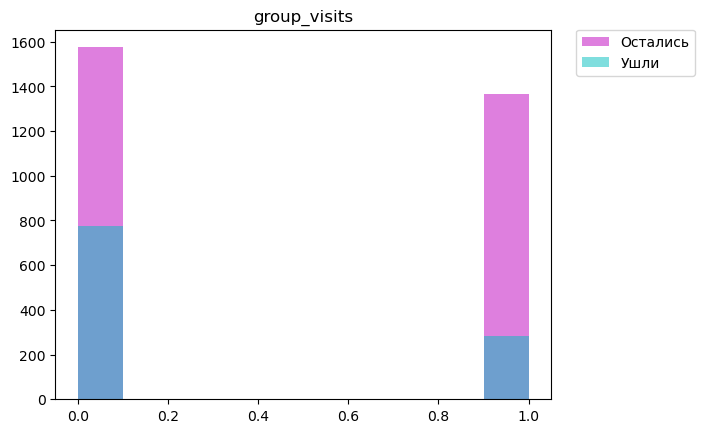

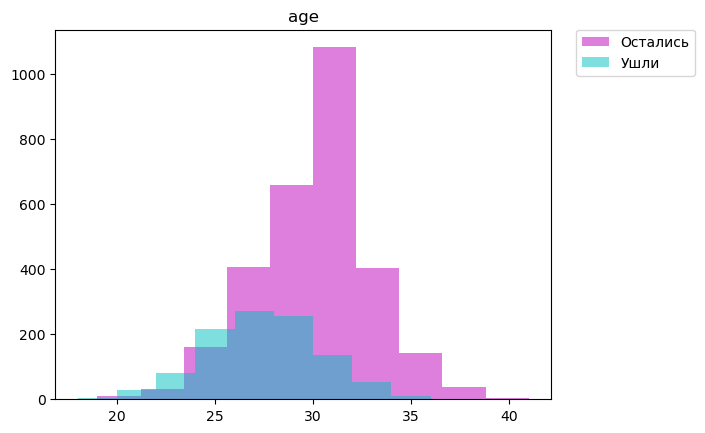

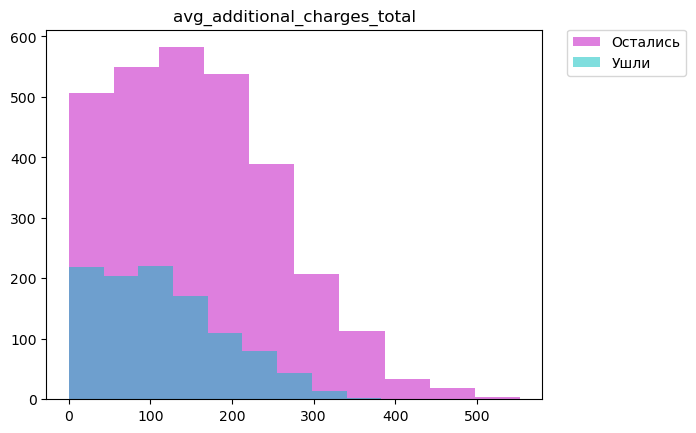

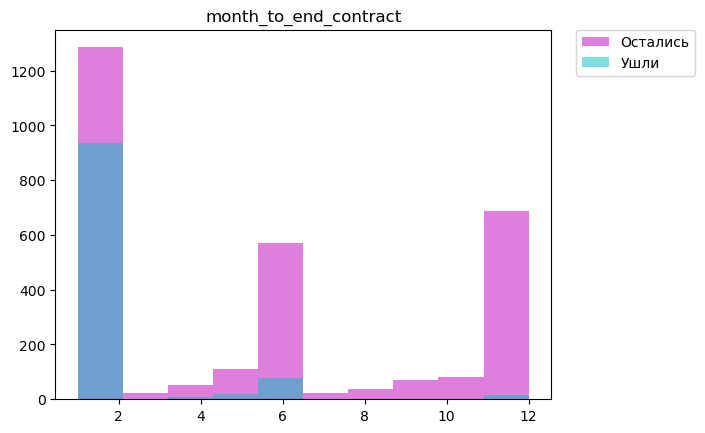

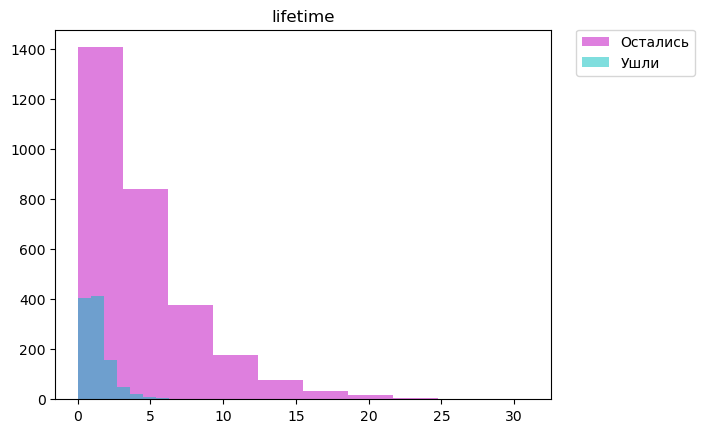

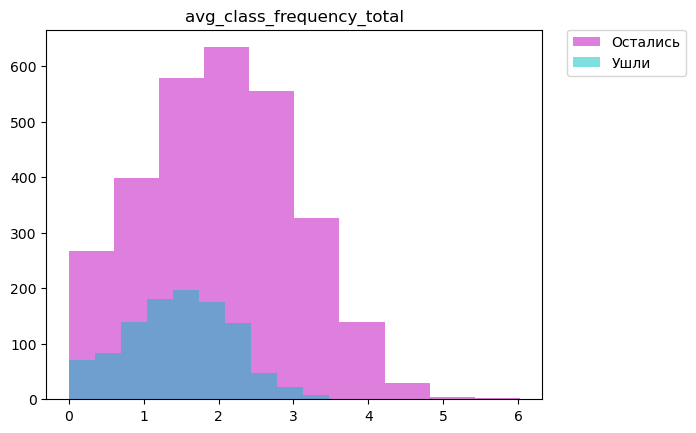

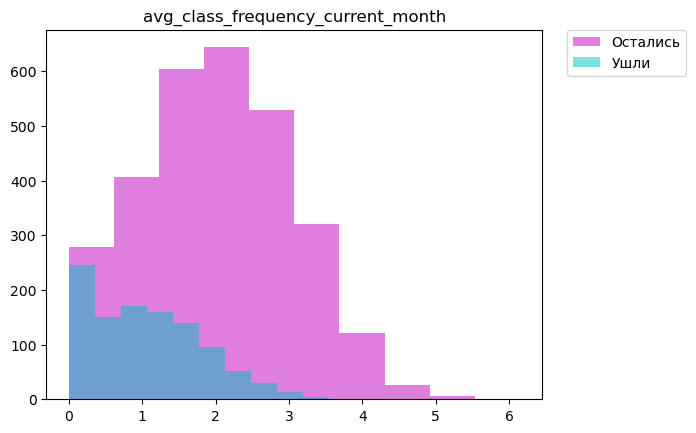

In [9]:
# Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
yes_churn = df[df['churn'] == 1]
no_churn = df[df['churn'] == 0]

for column in df.columns:
    if column == 'churn':
        continue
    plt.hist(no_churn[column], alpha=0.5, label='Остались', color='m')
    plt.hist(yes_churn[column], alpha=0.5, label='Ушли', color='c')
    plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0)
    plt.title(column)
    plt.show()

**Реже уходят клиенты:**   
- от 30-ти лет и старше  
- получил доступ по промо от друзей или через работодателя  
- взяли контракт на 6-12 месяцев.  

**Чаще всего уходят клиенты:**  
- до 28-ми лет  
- не живет/работает рядом с залом  
- контракт на 1 месяц  
- до окончания контракта 1 месяц  
- лайфтайм менее 5 месяцев.  

Построим матрицу корреляций и отобразим её.

In [10]:
pip install phik

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


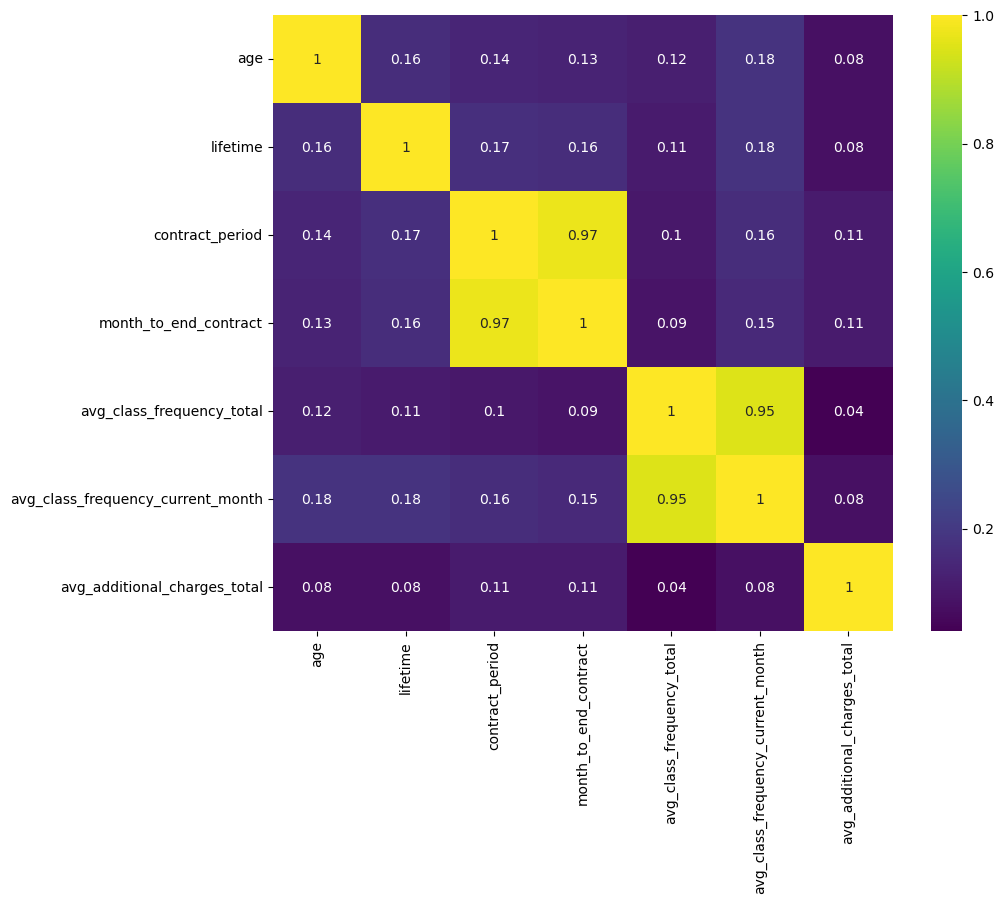

In [11]:
corr_cols = df[['age', 'lifetime', 'contract_period', 'month_to_end_contract', 
                'avg_class_frequency_total', 'avg_class_frequency_current_month','avg_additional_charges_total']]

cm = corr_cols.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, cmap='viridis')
plt.show()

Хорошая корреляция прослеживается между партнёрами и промо. А также между средней частотой посещений в неделю в прошлом месяце и выручкой от других услуг фитнес зала. Возможно дополнительные услуги зависят от частоты пользования залом.

# Построим модель прогнозирования оттока клиентов  
Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:  
- разбьем данные на обучающую и валидационную выборку функцией train_test_split()  
- обучим модель на train-выборке двумя способами:  
    1) логистической регрессией  
    2) случайным лесом  
    
Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

In [12]:
# разделю модель на обучающую и валидационную выборку
X = df.drop('churn', axis = 1)
y = df['churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Логистическая регрессия**

In [14]:
lr_model = LogisticRegression(random_state=0,solver='liblinear')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

**Случайный лес**

In [15]:
rf_model = RandomForestClassifier(n_estimators = 150, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

In [16]:
def metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('Accuracy:',accuracy_score(y_true, y_pred))
    print('Precision:',precision_score(y_true, y_pred))
    print('Recall:',recall_score(y_true, y_pred))
    print('F1:',f1_score(y_true, y_pred))
    print('ROC_AUC:',roc_auc_score(y_true, y_proba))
    print("-------------------------------")

# printing all metrics for both models:
metrics(y_test, lr_predictions, lr_probabilities , title='Logistic Regression:')
metrics(y_test, rf_predictions, rf_probabilities, title = 'Random Forest:')

Logistic Regression:
Accuracy: 0.925
Precision: 0.8631578947368421
Recall: 0.8282828282828283
F1: 0.8453608247422681
ROC_AUC: 0.9667019027484144
-------------------------------
Random Forest:
Accuracy: 0.91875
Precision: 0.844559585492228
Recall: 0.8232323232323232
F1: 0.8337595907928389
ROC_AUC: 0.969168428470754
-------------------------------


В нашем случае, модель случайного леса показывает результаты лучше, чем модель логистической регрессии.  

В 91,87% случаев модель случайного леса делает верные предсказания.  
Precision с показателем в 84,45% указывает на то, что модель случайного леса хорошо избегает ложные предстаказния.  
Recall с показателем в 82,32% указывает на способность модели случайного леса обнаруживать выборки, относящиеся к классу Positive.  
F1-score с показателем в 83,37% указывает на хороший баланс между полнотой и точностью.  
ROC_AUC с показателем в 96,91% указывает на высокую способность модели случайного леса различать классы.

# Сделаем кластеризацию клиентов  

- стандартизируем данные 
- построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму
- обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов
- посмотрим на средние значения признаков для кластеров
- построим распределения признаков для кластеров
- для каждого полученного кластера посчитаем долю оттока

In [17]:
sc = StandardScaler()
features_sc = sc.fit_transform(X)

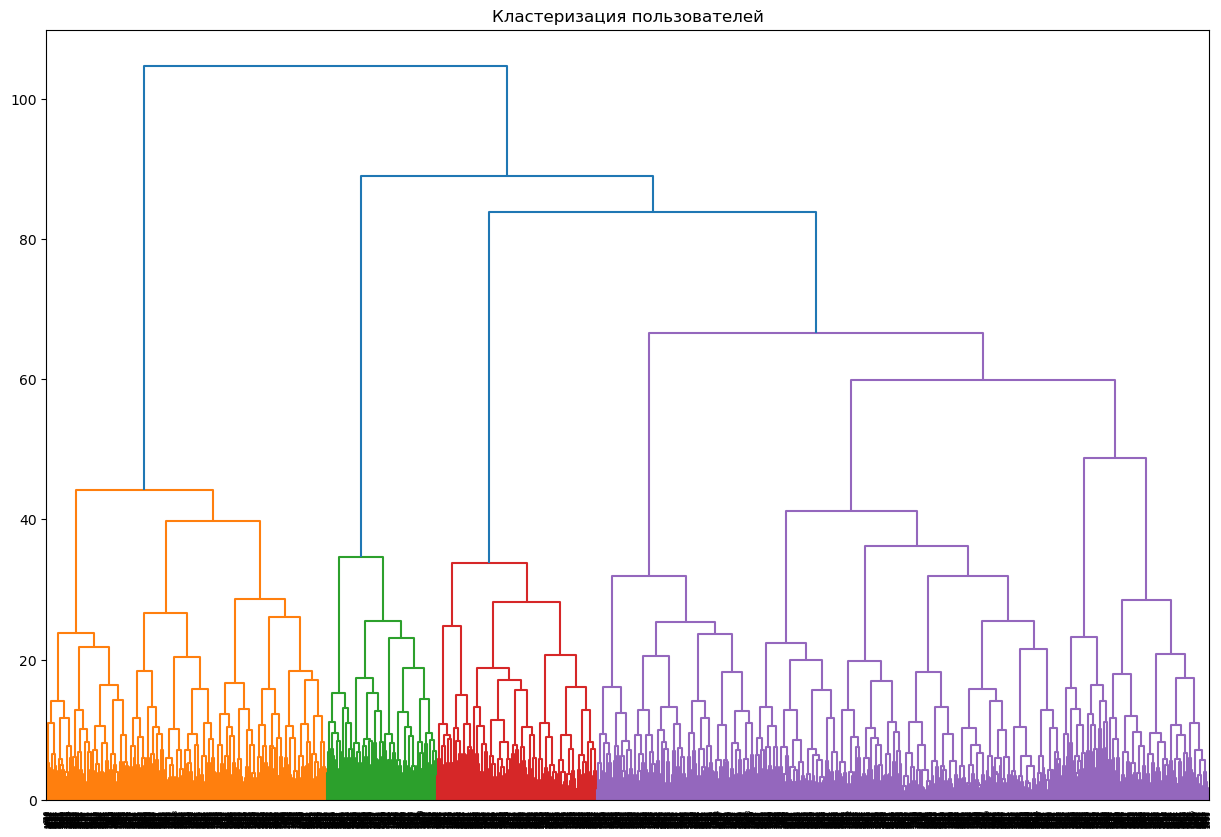

In [18]:
linked = linkage(features_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей')
plt.show() 

In [19]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state= 0)
labels = km.fit_predict(features_sc)
df['claster'] = labels
df.groupby('claster').agg('mean').T

claster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Класер 0 и 4 имеют наименьший отток. Кластер 3 лидирует по оттоку.  

In [20]:
df['claster'].value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: claster, dtype: int64

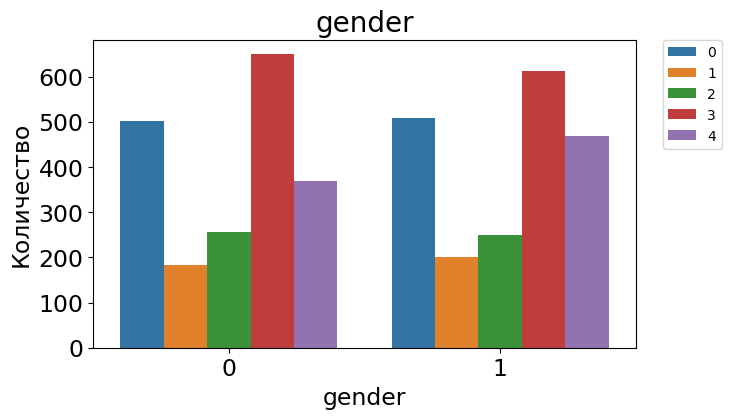

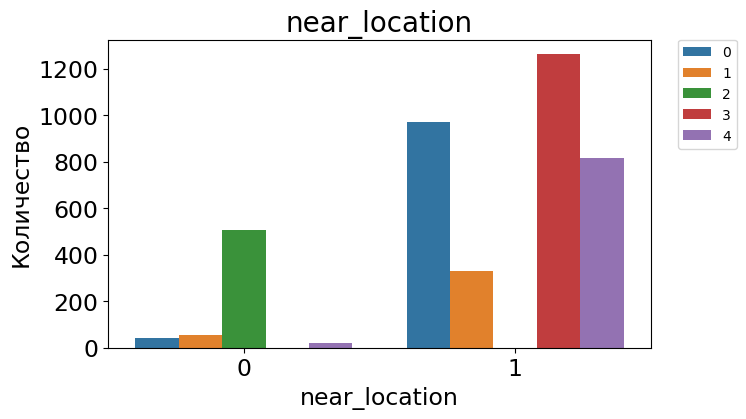

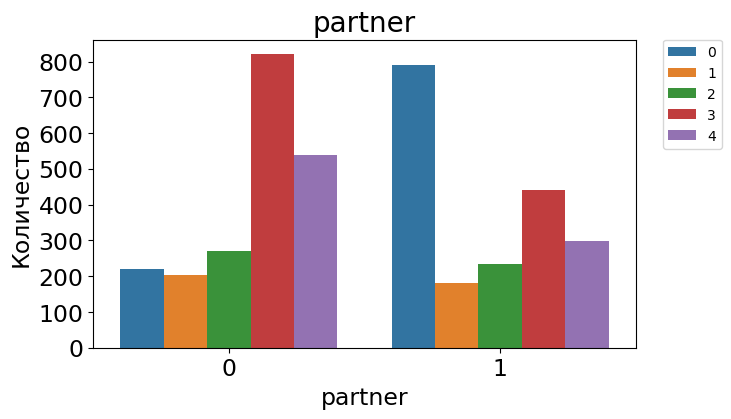

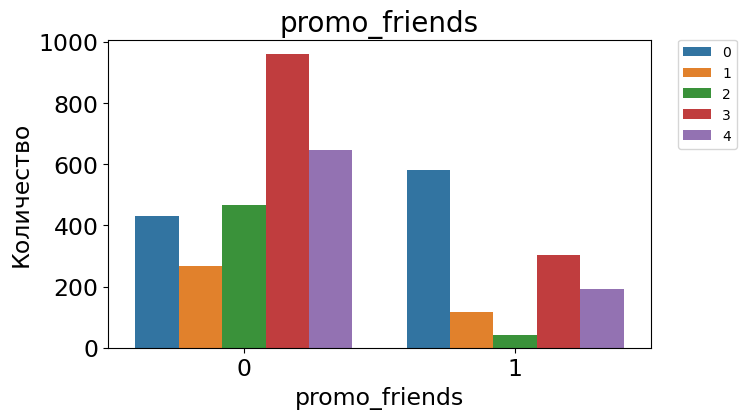

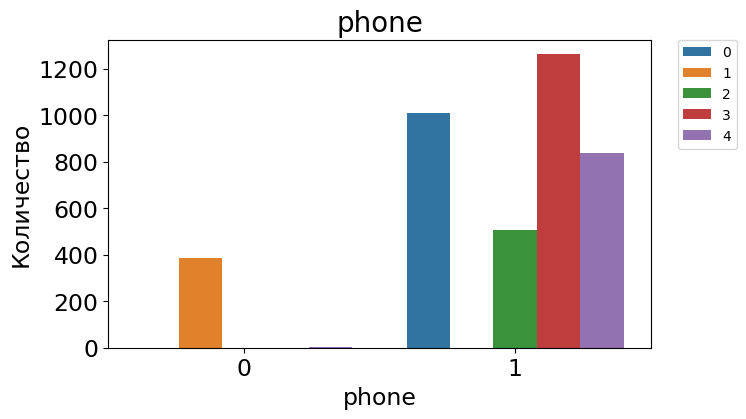

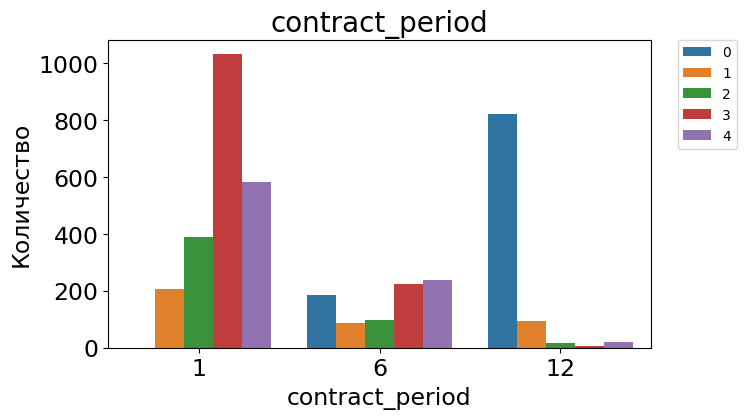

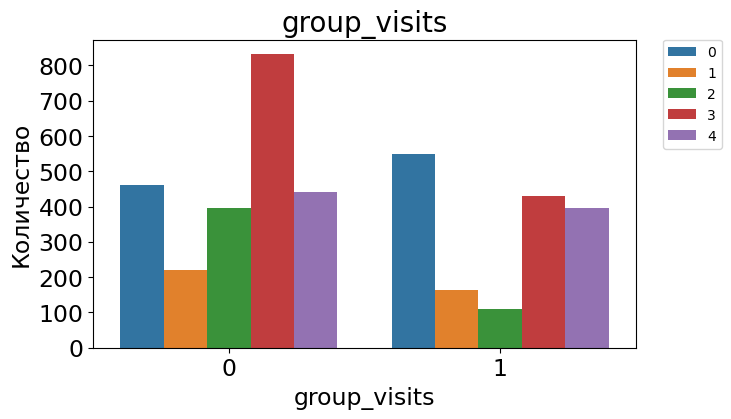

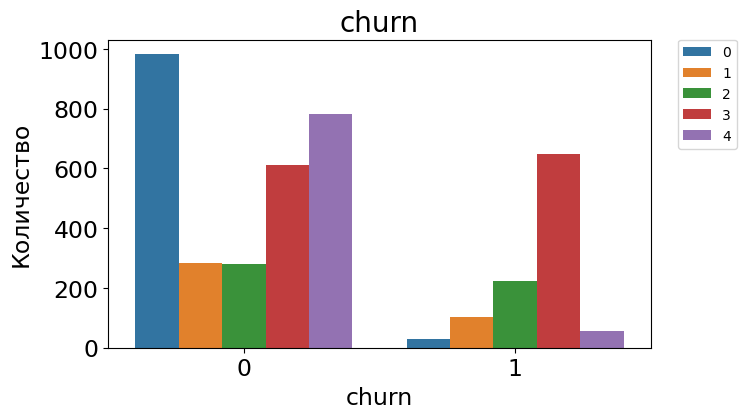

In [21]:
for column in df.columns:
    if len(df[column].unique()) <= 3:
        plt.figure(figsize=(7, 4))
        sns.countplot(x = column, data=df, hue='claster')
        plt.title(column, fontsize=20)
        plt.legend(fontsize=17)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel(column, fontsize=17)
        plt.ylabel('Количество', fontsize=17)
        plt.legend(bbox_to_anchor=(1.05 , 1), loc='upper left', borderaxespad= 0)
        plt.show

Гендер: все кластеры имеют схожее распределение мужчин/женщин.  
Расстояние до зала: в кластер 2 не попадают клиенты, которые живут/работают около зала.  
Телефоны: в кластер 1 попали только клиенты, которые не указывали номер мобильного телефона.  
Период контракта: нулевой кластер отличается максимальным значением в программе 12-ти месяцев и отсутствует в прогремме 1-го месяца.  

Признаки "хороших кластеров":
- кластер взрослее
- второй кластер выделяется длительностью абонемента
- оба кластера выделяются временем с момента первого обращения — ходят давно
- большой расходами на доплолнительные услуги
- средняя частота посещений в неделю за предыдущий месяц у них тоже выше

Для каждого полученного кластера посчитаем долю оттока (методом groupby()).

In [22]:
df.groupby('claster').agg({'churn':'mean'}).reset_index().rename(columns={'churn':'churn_rate'})

,claster,churn_rate
0,0,0.027723
1,1,0.267532
2,2,0.443564
3,3,0.514263
4,4,0.068019


Кластер 0 и 4 имеет наименьшую долю оттока. Кластер 2 и 3 наибольшую.

# Выводы и базовые рекомендации по работе с клиентами

**Общие выводы:**  
Модель случайного леса показывает результаты лучше, чем модель логистической регрессии.  
В 91,87% случаев модель случайного леса делает верные предсказания.  
Precision с показателем в 84,45% указывает на то, что модель случайного леса хорошо избегает ложные предстаказния.  
Recall с показателем в 82,32% указывает на способность модели случайного леса обнаруживать выборки, относящиеся к классу Positive.  
F1-score с показателем в 83,37% указывает на хороший баланс между полнотой и точностью.  
ROC_AUC с показателем в 96,91% указывает на высокую способность модели случайного леса различать классы.  

Признаки "хороших кластеров":
- кластер взрослее
- второй кластер выделяется длительностью абонемента
- оба кластера выделяются временем с момента первого обращения — ходят давно
- большой расходами на доплолнительные услуги
- средняя частота посещений в неделю за предыдущий месяц у них тоже выше  


**Рекомендации:**  
1) Предлагать скидки на дополнительные услуги при продлении абонемента.
2) Поддерживать и мотивировать тех у кого остается слишком маленький период членства в клубе, они не сильно стремятся продлевать.  
3) Уделить внимание и простроить логику индивидуальных предложений для чаще всего уходящих клиентов, а именно для клиентов:
- до 28-ми лет
- не живет/работает рядом с залом
- контракт на 1 месяц
- до окончания контракта 1 месяц
- лайфтайм менее 5 месяцев